In [1]:
from sklearn.model_selection import cross_val_score
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

# 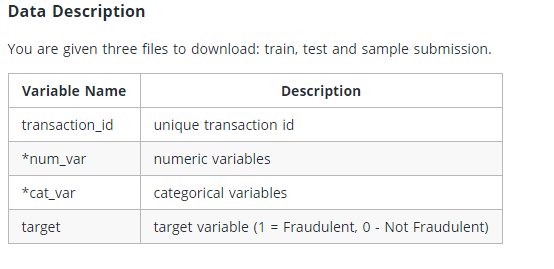

In [3]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(348978, 51)

In [5]:
train_data = train.iloc[:,1:50]
label = train.iloc[:,-1]

In [6]:
train_data.head()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,db,...,0,0,0,0,0,0,0,0,0,0
1,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,zl,...,0,0,0,0,0,0,0,0,0,0
2,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,gs,...,0,0,0,0,0,0,0,0,0,0
3,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,fy,...,0,0,0,0,0,0,0,0,0,0
4,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,zn,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
arr = []
for i in train_data.head(0):
    arr.append(i)
    # sns.distplot(train_data[str(i)]);
    #print(i)
    #sns.pairplot(result)
    #plt.show()
#for j in arr:
#    sns.distplot(train_data[str(j)]);    
#    plt.show()
    

In [8]:
[train_data.shape,label.shape]

[(348978, 49), (348978,)]

In [9]:
for i in train_data.head(0):
    train_data[i].fillna('no_'+i,inplace=True)

In [10]:
from sklearn import preprocessing

In [11]:
for i in train_data.head(0):    
    if (i not in ['num_var_1','num_var_2','num_var_3','num_var_4','num_var_5','num_var_6','num_var_7']):
        lbl = preprocessing.LabelEncoder()
        train_data[i] = lbl.fit_transform(train_data[i])

In [12]:
#for i in train_data.head(0):
#    print(" {} and sum ::{} ".format(i,train_data[i].mean()))

In [13]:
train_data.drop(['cat_var_26','cat_var_27','cat_var_28','cat_var_29','cat_var_31','cat_var_36','cat_var_37','cat_var_38','cat_var_39','cat_var_40','cat_var_41','cat_var_42'],axis = 1,inplace = True)
       

In [14]:
train_data.shape

(348978, 37)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
scalled_train_data = RobustScaler().fit_transform(train_data)
#from scipy.stats import zscore
#scalled_train_data = train_data.apply(zscore)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(scalled_train_data,label,test_size = 0.3,random_state = 30)

In [19]:
[x_train.shape,y_train.shape],[x_test.shape,y_test.shape]

([(244284, 37), (244284,)], [(104694, 37), (104694,)])

In [20]:
#from sklearn.calibration import CalibratedClassifierCV
#cal = CalibratedClassifierCV().fit(x_train,y_train)
#cal.predict(y_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.metrics import roc_auc_score


In [23]:
#x_train

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf_random_forest = RandomForestClassifier(n_estimators =100,n_jobs =-1,max_features =6,random_state=0).fit(x_train,y_train)

In [26]:
r_pred = clf_random_forest.predict(x_test)

In [27]:
accuracy_score(y_test,r_pred)

0.92966168070758592

In [28]:
roc_auc_score(y_test,r_pred)

0.69321206051649675

In [29]:
#clf.predict_proba(x_test)

# Test

In [30]:
test = pd.read_csv('test.csv')

In [31]:
test.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,id_1,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,...,0,0,0,0,0,0,0,0,0,0
1,id_6,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
2,id_9,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,...,0,0,0,0,0,0,0,0,0,0
3,id_14,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_15,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test_data = test.iloc[:,1:50]
#test_data.drop(['cat_var_36','cat_var_37','cat_var_38','cat_var_39','cat_var_40','cat_var_41','cat_var_42'],axis = 1,inplace = True)
test_data.drop(['cat_var_26','cat_var_27','cat_var_28','cat_var_29','cat_var_31','cat_var_36','cat_var_37','cat_var_38','cat_var_39','cat_var_40','cat_var_41','cat_var_42'],axis = 1,inplace = True)

In [33]:
test_data.head()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,...,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_25,cat_var_30,cat_var_32,cat_var_33,cat_var_34,cat_var_35
0,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,gt,...,1,0,0,1,0,0,0,0,0,0
1,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,NaN,...,1,0,0,1,0,0,0,0,0,0
2,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,qz,...,1,0,0,1,0,0,0,0,0,0
3,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,ex,...,1,0,0,1,0,0,0,0,0,0
4,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,NaN,...,0,1,0,1,0,0,0,0,0,0


In [34]:
for i in test_data.head(0):
    test_data[i].fillna('no_'+i,inplace=True)

In [35]:
for i in test_data.head(0):    
    if (i not in ['num_var_1','num_var_2','num_var_3','num_var_4','num_var_5','num_var_6','num_var_7']):
        lbl = preprocessing.LabelEncoder()
        test_data[i] = lbl.fit_transform(test_data[i])

In [36]:
print("train data ::{} test data ::{}".format(train_data.shape,test_data.shape))

train data ::(348978, 37) test data ::(523466, 37)


In [37]:
scalled_test_data = RobustScaler().fit_transform(test_data)

In [38]:
#test_data_pred_prob = clf.predict_proba(test_data)
#test_data_pred_prob = clftree.predict_proba(scalled_test_data)
test_data_pred_prob = clf_random_forest.predict_proba(scalled_test_data)

In [39]:
test_data_pred_prob

array([[ 0.96,  0.04],
       [ 0.97,  0.03],
       [ 0.66,  0.34],
       ..., 
       [ 0.76,  0.24],
       [ 0.74,  0.26],
       [ 0.92,  0.08]])

In [40]:
submission = pd.DataFrame({'transaction_id':test['transaction_id'],
                           'target':test_data_pred_prob[:,1]})

In [41]:
submission.to_csv('submission.csv',index = False,columns=['transaction_id', 'target'])

In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import ExtraTreesClassifier

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_score_ , grid.best_params_

In [ ]:
Grid_Search_CV_RFR(x_train,y_train)